<h1><center>Who Survived the Titanic?</center></h1>

**Question :**	*What	categories	of	passengers	were	most	likely	to	survive	the	Titanic	disaster?*<br><br>
**Answer :** The main category of survival came from **Sex** attribute, about 75% of female survived than male. The female **titles** have more survived then any other title. Passengers with **higher** fare value are most likely to survive, 67% of higher class has been survived, mostly died age between 15 and 50 of lower class. Also **small families** more survived than single and large families.


**Question :** *What other attributes did you use for the analysis? Explain how you used them. Provide a complete list of all attributes used.*<br><br>
**Answer :** The attributes **SibSp** and **Parch** is used to create a new attribute called **FailySize** and then it helped to create another attribute **FamilySizeType** to further regrouping the family to Single (1p), Small (2p-4p) or Large(5p or more). Based on that attribute it has been analyse that the Single or Large family has less survival rate.

**Question :** *Did you engineer any attributes? If yes, explain the rationale and how the new attributes
were used in the analysis? If you have excluded any attributes from the analysis, provide an explanation
why you believe they have to be excluded?*<br><br>
**Answer :** There are few newly engineered attributes like **Title** through title dictionary, which was later used to calculate Age attribute missing values. Also there are some other attributes like **FamilySize, Singleton, SmallFamily, LargeFamily, and FamilySizeType** were created and used in analysis.
<br>
PassengerId and Cabin from out anlysis becuase the cabin has a lot of missing values 
and PassengerId is unique and dont think we need to use it.

**Question :** *How did you treat missing values? Provide a detailed explanation in the comments.?*<br>
**Answer :** The **Age** attribute has some missing values and it was generated through each median value of group by **Sex, Pclass and Title**. The missing values can be identify by running dataframe's **info()** method below.

**Note** *All answers has been proved in following code and charts.*

In [1]:
#import libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#load data from csv...
data = pd.read_csv('train.csv')  

In [2]:
# We get the information about the data frame value and type
# Looking into the information returns we can see that age, cabin attributes have missing values (NaN)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
# 1. Let's engineer 'Title' attribute to update age in next section.
# we extract the title from each name
data['Title'] = data.Name.map(lambda name:name.split(',')[1].split('.')[0].strip())
    
# a map of more aggregated titles
Title_Dictionary = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
    
# we map each title, introduced a new attribute
data.Title = data.Title.map(Title_Dictionary) 

In [4]:
# Let's engineer Family attributes, which will use in analysis.
# FamilySize value comes from Parch and SibSp total with the each single person count (one).
data['FamilySize'] = data.Parch + data.SibSp + 1   

# introducing other features based on the family size i.e. Singleton, SmallFamily and LargeFamily flags
data['Singleton'] = data.FamilySize.map(lambda s : 1 if s == 1 else 0)
data['SmallFamily'] = data.FamilySize.map(lambda s : 1 if 2 <= s <= 4 else 0)
data['LargeFamily'] = data.FamilySize.map(lambda s : 1 if 5 <= s else 0)

# create familysizetype attribute and map value to 1, 2, 3 from above attributes.
data['FamilySizeType'] = data.FamilySize.map(lambda s : 1 if s == 1 else 2 if 2 <= s <= 4 else 3)

In [5]:
# Some values of age attribute is missing.
# Update each age with median() value of group by data for Sex, Pclass, and new attribute Title to create more accuracy.
data.Age = data.groupby(['Sex','Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))

,Survived
Sex,
female,74.203822
male,18.890815


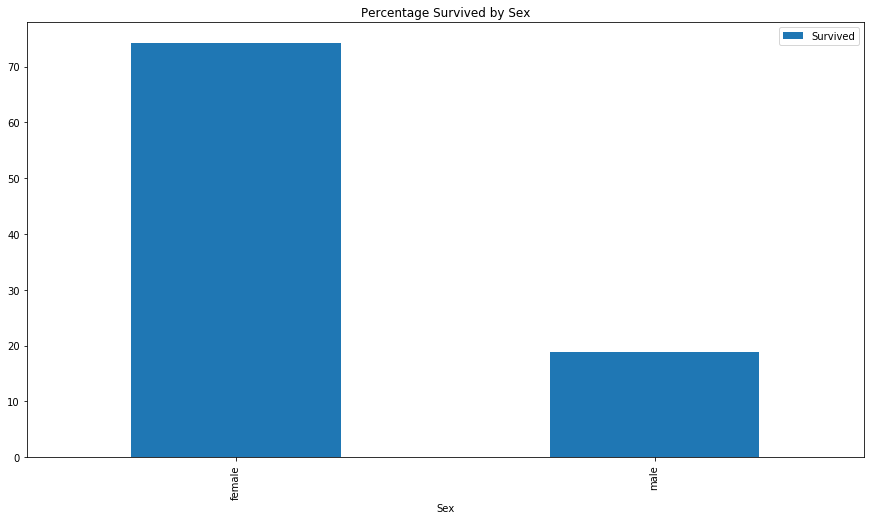

In [6]:
# Let's create our first basic chart for Sex attribute.
# Calculate percentage for each sex survived.
sexsurvived = data[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False) * 100
sexsurvived.plot(kind='bar', figsize=(15,8), title='Percentage Survived by Sex')
sexsurvived

<center>Above chart shows about **75%** female survived.</center>

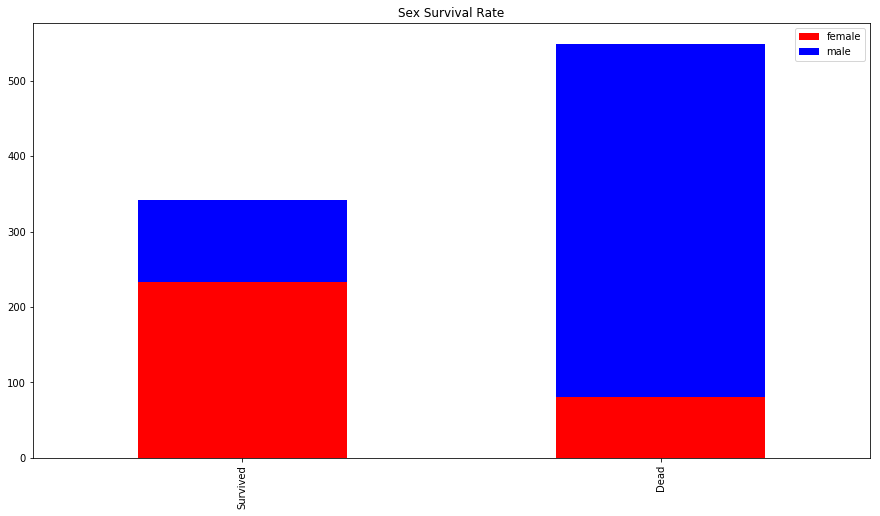

In [7]:
# Get count for Survived and Dead for each Sex attribute.
survived_sex = data[data.Survived == 1]['Sex'].value_counts()
dead_sex = data[data.Survived == 0]['Sex'].value_counts()

# Create dataframe through above counts.
df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Survived', 'Dead'] # Assign dataframe index.

# Create chart through data frame with figure size define.
df.plot(kind='bar', stacked=True, figsize=(15,8), title='Sex Survival Rate', color = ['r','b'])

<center>Similarly, above chart shows females more survived.</center>

Title
Master      23
Miss       129
Mr          81
Mrs        101
Officer      5
Royalty      3
Name: Survived, dtype: int64

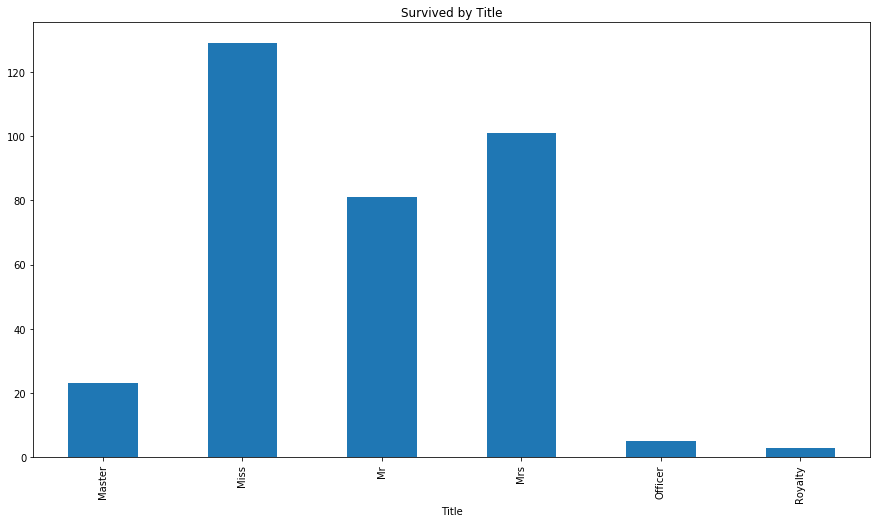

In [8]:
# Create chart for survived by Title attribute.
ax = data[data.Survived == 1].groupby(['Title'])['Survived'].count()
ax.plot(kind='bar', figsize=(15,8), title='Survived by Title')
ax

<center>Above chart shows female title survived.</center>

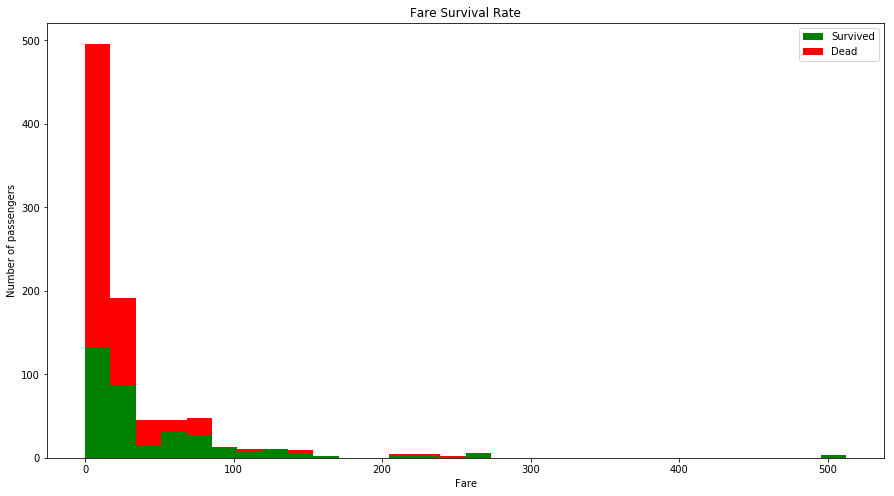

In [9]:
# Set screen size
plt.figure(figsize=(15,8))

# Set data
plt.hist([data[data.Survived==1]['Fare'],
          data[data.Survived==0]['Fare']], 
          stacked=True, 
          color = ['g','r'],
          bins = 30, 
          label = ['Survived','Dead'])

# Set legend upper right corner
plt.legend(loc='upper right')

# Set Title
plt.title('Fare Survival Rate')

# Set X and Y Axis labels
plt.xlabel('Fare')
plt.ylabel('Number of passengers')

# Show chart
plt.show()

<center>Passengers with **higher** fare are most likely to survive.<center/><br>
Therefore, we can correlates ticket fare with the class in following chart.

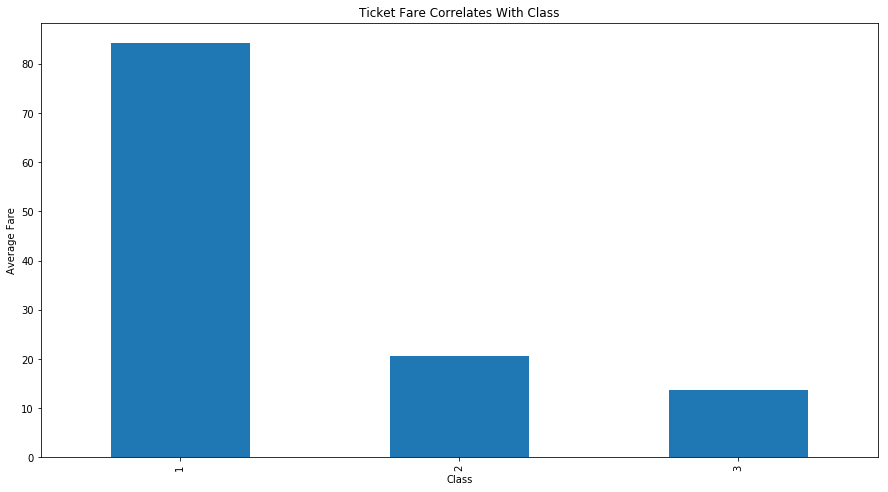

In [10]:
# Group by class with mean() of fare and create bar chart
ax = data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(15,8), title='Ticket Fare Correlates With Class') 
ax.set_xlabel('Class')
ax.set_ylabel('Average Fare')

,Survived
1st,62.962963
2nd,47.282609
3rd,24.236253


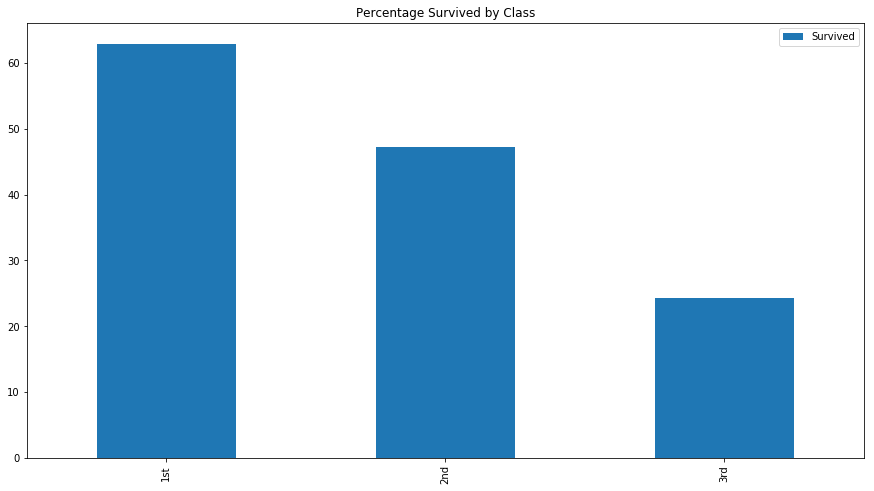

In [11]:
# Create chart percentage survived by class
classsurvived = data[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False) * 100
classsurvived.index = ['1st', '2nd', '3rd']
classsurvived.plot(kind='bar', figsize=(15,8), title='Percentage Survived by Class')
classsurvived

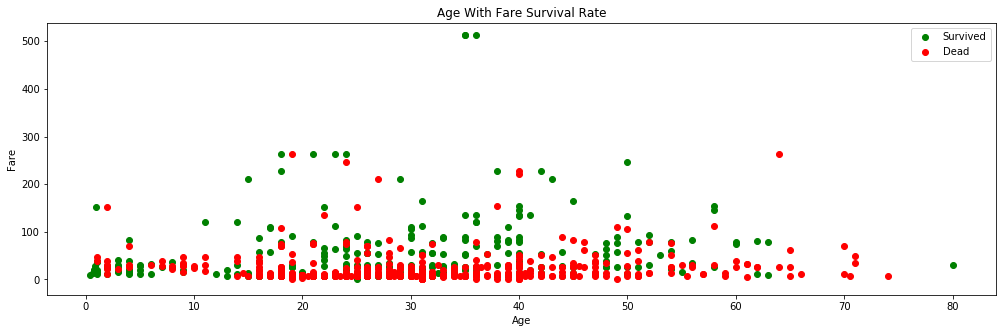

In [12]:
# Let's combine the age, the fare and the survival on a single chart.
# Set screen size
plt.figure(figsize=(17,5))

# Set Data
plt.scatter(data[data.Survived==1]['Age'], data[data.Survived==1]['Fare'], color='green')
plt.scatter(data[data.Survived==0]['Age'], data[data.Survived==0]['Fare'], color='red')

# Set legend upper right corner
plt.legend(('Survived','Dead'), loc='upper right')

# Set Title
plt.title('Age With Fare Survival Rate')

# Set X and Y Axis labels
plt.xlabel('Age')
plt.ylabel('Fare')

# Show chart
plt.show()

<center>As we can see in above chart, mostly red dots are age between 15 and 50 of lower class, therefore, higher class of same age more survived.</center>

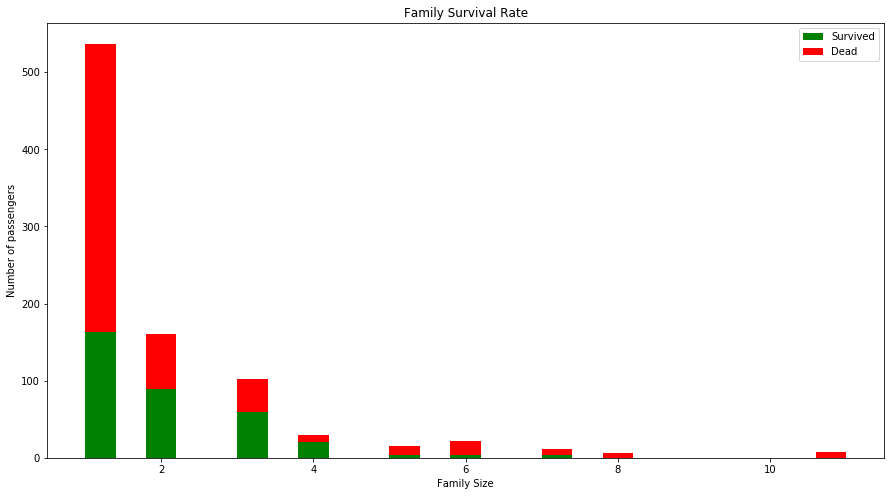

In [13]:
# Create chart for families survival.
# Set screen size
plt.figure(figsize=(15,8))

# Set Data
plt.hist([data[data.Survived==1]['FamilySize'],
          data[data.Survived==0]['FamilySize']], 
          stacked=True, 
          color = ['g','r'],
          bins = 25, 
          label = ['Survived','Dead'])

# Set legend upper right corner
plt.legend(loc='upper right')

# Set Title
plt.title('Family Survival Rate')

# Set X and Y Axis labels
plt.xlabel('Family Size')
plt.ylabel('Number of passengers')

# Show chart
plt.show()

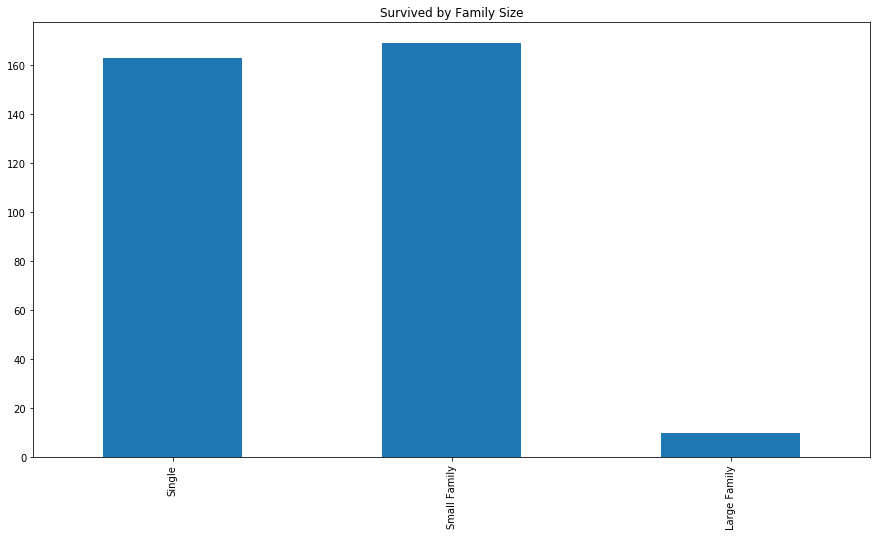

In [14]:
# Create chart with 'FamilySizeType' attribute with Survived.
ax = data[data.Survived == 1].groupby(['FamilySizeType'])['Survived'].count()
ax.index = ['Single', 'Small Family', 'Large Family']
ax.plot(kind='bar', figsize=(15,8), title='Survived by Family Size')

<center>Passengers have small family most like to survive.</center>

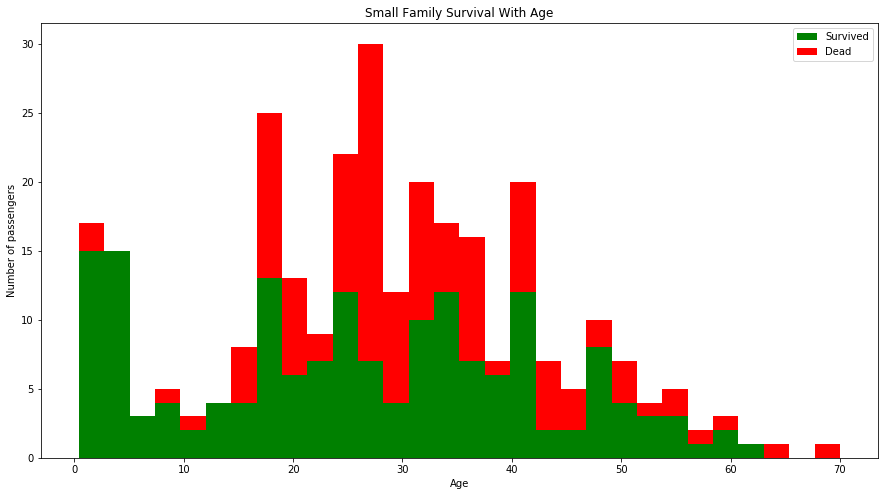

In [15]:
# Now we can compare **'SmallFamily'** with **Age** attribute.
# Set screen size
plt.figure(figsize=(15,8))

# Set Data
plt.hist([data[(data.Survived==1) & (data.SmallFamily==1)]['Age'],
          data[(data.Survived==0) & (data.SmallFamily==1)]['Age']], 
          stacked=True, 
          color = ['g','r'],
          bins = 30, 
          label = ['Survived','Dead'])

# Set legend upper right corner
plt.legend(loc='upper right')

# Set Title
plt.title('Small Family Survival With Age')

# Set X and Y Axis labels
plt.xlabel('Age')
plt.ylabel('Number of passengers')

# Show chart
plt.show()